# Data Analysis

## Data Loading

In [20]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_processing import load_train_and_test_data

train_data, test_data = load_train_and_test_data()

## Data Inspection

### Training Set Sample

In [21]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Test Set Sample

In [22]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### Data Types

In [23]:
import pandas as pd

data_types = train_data.dtypes
pd.DataFrame(data_types, columns=['Type'])

,Type
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


## Data Cleaning and Preprocessing

### Handle Missing Values

#### Training Set

In [24]:
missing_values = train_data.isnull().sum()
pd.DataFrame(missing_values, columns=["Count"])

,Count
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


#### Test Set

In [25]:
missing_values = test_data.isnull().sum()
pd.DataFrame(missing_values, columns=["Count"])

,Count
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0


### Handle Duplicate Rows

#### Training Set

In [26]:
duplicates_count = train_data.duplicated().sum()
duplicates_count

np.int64(0)

#### Test Set

In [27]:
duplicates_count = test_data.duplicated().sum()
duplicates_count

np.int64(0)

### Transform Datetime Feature

In [39]:
from data_processing import transform_datetime

train_data_transformed = transform_datetime(train_data)
train_data_transformed.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_sin,hour_cos,day,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.000000,1.000000,5,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.258819,0.965926,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.500000,0.866025,5,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.707107,0.707107,5,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.866025,0.500000,5,1


### Convert Categorical Features

In [29]:
unique_values = train_data_transformed.nunique()
pd.DataFrame(unique_values, columns=["Unique Values Count"])

,Unique Values Count
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309
registered,731


In [30]:
from data_processing import perform_categorical_conversion

train_data_processed = perform_categorical_conversion(train_data_transformed)
data_types_after_processing = train_data_processed.dtypes
pd.DataFrame(data_types_after_processing, columns=["Type"])

,Type
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64
registered,int64


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical Features

##### Summary Statistics

In [31]:
from config import TARGET_VARIABLES

numerical = train_data_processed.select_dtypes(
    include=['float64', 'int64', 'int32']).drop(columns=TARGET_VARIABLES).columns

def calculate_numerical_statistics(columns, data):
    basic_stats = data[columns].describe()
    extended_stats = basic_stats.T
    
    extended_stats['median'] = data[columns].median()
    extended_stats['variance'] = data[columns].var()
    extended_stats['range'] = data[columns].max() - \
        data[columns].min()
    extended_stats['iqr'] = data[columns].quantile(
        0.75) - data[columns].quantile(0.25)
    extended_stats['skewness'] = data[columns].skew()
    extended_stats['kurtosis'] = data[columns].kurtosis()
    
    return extended_stats

calculate_numerical_statistics(numerical, train_data_processed)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
temp,10886.0,20.230860,7.791590,0.82,13.940000,2.050000e+01,26.240000,41.0000,2.050000e+01,60.708872,40.1800,12.300000,0.003691,-0.914530
atemp,10886.0,23.655084,8.474601,0.76,16.665000,2.424000e+01,31.060000,45.4550,2.424000e+01,71.818856,44.6950,14.395000,-0.102560,-0.850076
humidity,10886.0,61.886460,19.245033,0.00,47.000000,6.200000e+01,77.000000,100.0000,6.200000e+01,370.371306,100.0000,30.000000,-0.086335,-0.759818
windspeed,10886.0,12.799395,8.164537,0.00,7.001500,1.299800e+01,16.997900,56.9969,1.299800e+01,66.659670,56.9969,9.996400,0.588767,0.630133
hour_sin,10886.0,-0.003772,0.706975,-1.00,-0.707107,0.000000e+00,0.707107,1.0000,0.000000e+00,0.499814,2.0000,1.414214,0.009533,-1.498205
hour_cos,10886.0,-0.002835,0.707287,-1.00,-0.707107,-1.836970e-16,0.707107,1.0000,-1.836970e-16,0.500255,2.0000,1.414214,0.007897,-1.499117


##### Distributions

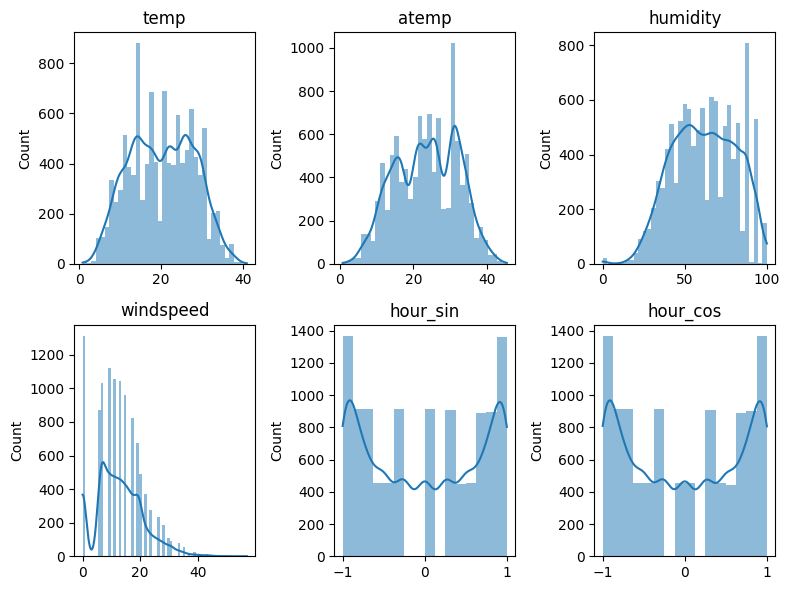

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_subplots_layout(columns):
    num_features = len(columns)
    num_cols = 2 if num_features < 5 else 3
    num_rows = (num_features + num_cols - 1) // num_cols
    
    return num_rows, num_cols

def rotate_xticklabels_if_long(ax, label_length_threshold=5, rotation_angle=45):
    labels = [item.get_text() for item in ax.get_xticklabels()]
    if any(len(label) > label_length_threshold for label in labels):
        ax.tick_params(axis='x', labelrotation=rotation_angle)

def plot_numerical_distributions(columns, data):
    num_rows, num_cols = calculate_subplots_layout(columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(columns):
        sns.histplot(data[feature], ax=axes[i], kde=True, edgecolor=None)
        axes[i].set_title(feature)
        axes[i].set_xlabel('')
        rotate_xticklabels_if_long(axes[i])

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_numerical_distributions(numerical, train_data_processed)

#### Categorical Features

##### Summary Statistics

In [33]:
categorical = train_data_processed.select_dtypes(
    include=['category']).columns

train_data_processed[categorical].describe()

,season,holiday,workingday,weather,day,month
count,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,7,12
top,4,0,1,1,5,8
freq,2734,10575,7412,7192,1584,912


##### Distributions

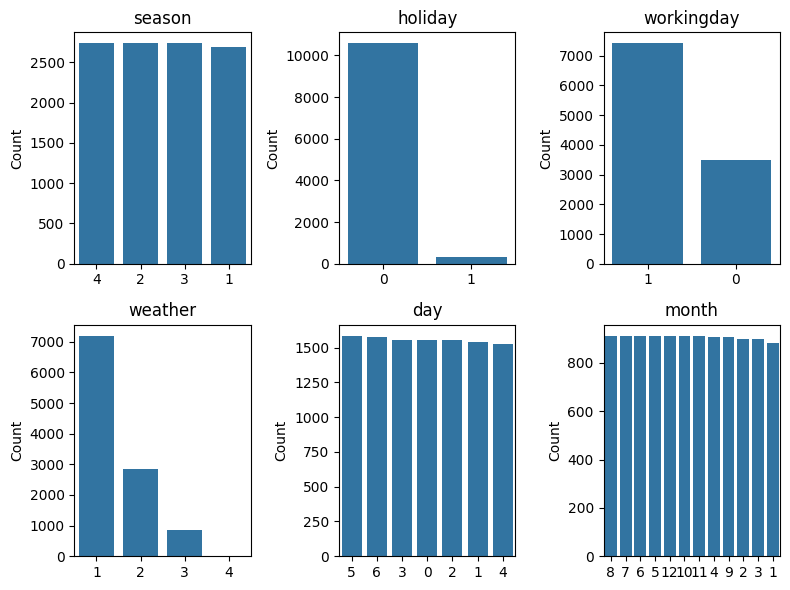

In [34]:
def plot_categorical_distributions(categorical, data):
    num_rows, num_cols = calculate_subplots_layout(categorical)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
    axes = axes.flatten()

    for i, col in enumerate(categorical):
        sns.countplot(data=train_data_processed, x=col,
                    ax=axes[i], order=train_data_processed[col].value_counts().index)
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(categorical, train_data_processed)

#### Target Variables

##### Summary Statistics

In [35]:
calculate_numerical_statistics(TARGET_VARIABLES, train_data_processed)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
casual,10886.0,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0,17.0,2496.049219,367,45.0,2.495748,7.551629
registered,10886.0,155.552177,151.039033,0.0,36.0,118.0,222.0,886.0,118.0,22812.789514,886,186.0,1.524805,2.626081
count,10886.0,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0,145.0,32813.313153,976,242.0,1.242066,1.300093


##### Transform Data

In [36]:
from data_processing import transform_target_variable_data

train_data_transformed = transform_target_variable_data(train_data_processed)
calculate_numerical_statistics(TARGET_VARIABLES, train_data_transformed)

,count,mean,std,min,25%,50%,75%,max,median,variance,range,iqr,skewness,kurtosis
casual,10886.0,2.712439,1.491055,0.000000,1.609438,2.890372,3.912023,5.908083,2.890372,2.223245,5.908083,2.302585,-0.224723,-0.869697
registered,10886.0,4.395774,1.399383,0.000000,3.610918,4.779123,5.407172,6.787845,4.779123,1.958273,6.787845,1.796254,-0.855562,-0.069953
count,10886.0,4.591364,1.419454,0.693147,3.761200,4.983607,5.652489,6.885510,4.983607,2.014850,6.192362,1.891289,-0.851412,-0.119483


##### Distributions

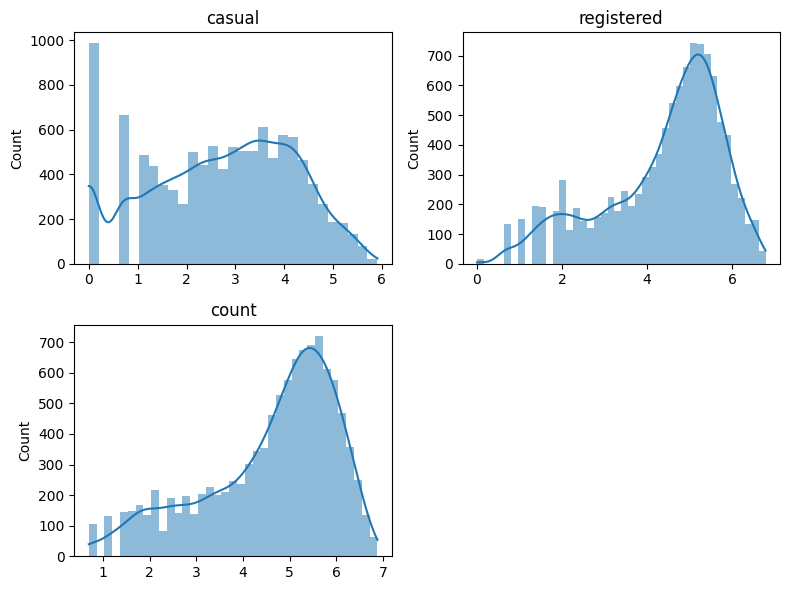

In [37]:
plot_numerical_distributions(TARGET_VARIABLES, train_data_transformed)

### Bivariate Analysis

#### Numerical - Numerical Features

In [40]:
import numpy as np

def calculate_pearson_correlation(numerical_features1, numerical_features2, data):
    results = []

    for feature1 in numerical_features1:
        for feature2 in numerical_features2:
            if feature1 == feature2:
                continue
            corr = data[[feature1, feature2]].corr().iloc[0, 1]
            
            results.append({
                'Feature 1': feature1,
                'Feature 2': feature2,
                'Pearson Correlation': np.abs(corr)
            })

    results_df = pd.DataFrame(results)
    ordered_results_df = results_df.sort_values(by='Pearson Correlation', ascending=False)
    ordered_results_df.reset_index(drop=True, inplace=True)
    
    return ordered_results_df

pearson = calculate_pearson_correlation(numerical, numerical, train_data_transformed)
pearson

,Feature 1,Feature 2,Pearson Correlation
0,temp,atemp,0.984948
1,atemp,temp,0.984948
2,humidity,hour_sin,0.367737
3,hour_sin,humidity,0.367737
4,windspeed,humidity,0.318607
5,humidity,windspeed,0.318607
6,humidity,hour_cos,0.276767
7,hour_cos,humidity,0.276767
8,hour_sin,temp,0.196330
9,temp,hour_sin,0.196330


#### Numerical - Categorical Features

In [46]:
from scipy.stats import f_oneway

def perform_anova_test(numerical, categorical, alpha=0.01):
    results = []

    for num_feature in numerical:
        for cat_feature in categorical:
            groups = [train_data_transformed[train_data_transformed[cat_feature] == level][num_feature] for level in train_data_transformed[cat_feature].unique()]
            f_stat, p_value = f_oneway(*groups)
            
            results.append({
                'Numerical Feature': num_feature,
                'Categorical Feature': cat_feature,
                'F-statistic': f_stat,
                'P-value': p_value
            })

    results_df = pd.DataFrame(results)
    filtered_results_df = results_df[results_df['P-value'] < alpha]
    ordered_results_df = filtered_results_df.sort_values(by='F-statistic', ascending=False)
    ordered_results_df.reset_index(drop=True, inplace=True)
    
    return ordered_results_df

anova = perform_anova_test(numerical, categorical)
anova

,Numerical Feature,Categorical Feature,F-statistic,P-value
0,temp,season,6040.687453,0.000000e+00
1,atemp,season,5361.825789,0.000000e+00
2,temp,month,3087.902639,0.000000e+00
3,atemp,month,2604.202390,0.000000e+00
4,humidity,weather,717.041823,0.000000e+00
5,humidity,season,140.898799,1.439441e-89
6,windspeed,season,92.605594,3.548098e-59
7,humidity,month,91.532391,1.490320e-199
8,windspeed,month,40.833379,1.652649e-87
9,humidity,day,19.319136,1.562323e-22


#### Categorical - Categorical Features

In [47]:
from scipy.stats import chi2_contingency

def calculate_chi2(categorical_features, data, alpha=0.001):
    results = []

    for cat_feature1 in categorical_features:
        for cat_feature2 in categorical_features:
            if cat_feature1 == cat_feature2:
                continue
            
            contingency_table = pd.crosstab(data[cat_feature1], data[cat_feature2])
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            results.append({
                'Categorical Feature 1': cat_feature1,
                'Categorical Feature 2': cat_feature2,
                'Chi-Square Statistic': chi2_stat,
                'P-value': p_value
            })

    results_df = pd.DataFrame(results)
    filtered_results_df = results_df[results_df['P-value'] < alpha]
    ordered_results_df = filtered_results_df.sort_values(by='Chi-Square Statistic', ascending=False)
    ordered_results_df.reset_index(drop=True, inplace=True)
    
    return ordered_results_df

chi2 = calculate_chi2(categorical, train_data_transformed)
chi2

,Categorical Feature 1,Categorical Feature 2,Chi-Square Statistic,P-value
0,season,month,32658.000000,0.000000e+00
1,month,season,32658.000000,0.000000e+00
2,workingday,day,9632.834791,0.000000e+00
3,day,workingday,9632.834791,0.000000e+00
4,day,holiday,1074.559169,6.659299e-229
5,holiday,day,1074.559169,6.659299e-229
6,holiday,workingday,679.830361,7.274718e-150
7,workingday,holiday,679.830361,7.274718e-150
8,month,holiday,341.279082,1.695226e-66
9,holiday,month,341.279082,1.695226e-66


#### Numerical Features - Target Variables

In [44]:
pearson = calculate_pearson_correlation(numerical, TARGET_VARIABLES, train_data_transformed)
pearson

,Feature 1,Feature 2,Pearson Correlation
0,temp,casual,0.467097
1,atemp,casual,0.462067
2,hour_sin,count,0.418138
3,hour_cos,count,0.413897
4,hour_cos,casual,0.401904
5,temp,count,0.394454
6,atemp,count,0.389784
7,hour_sin,casual,0.379603
8,hour_sin,registered,0.375918
9,hour_cos,registered,0.363454


#### Categorical Features - Target Variables


In [45]:
ordered_results_df = perform_anova_test(TARGET_VARIABLES, categorical)
ordered_results_df

,Numerical Feature,Categorical Feature,F-statistic,P-value
0,casual,workingday,1233.997592,3.561967e-256
1,casual,season,344.660562,7.937799e-214
2,count,season,236.946711,6.164843e-149
3,casual,day,205.974432,1.016117e-249
4,registered,season,167.975391,1.888299e-106
5,registered,workingday,157.570453,6.806494e-36
6,casual,month,119.598208,1.178251e-259
7,count,month,78.483391,3.967012e-171
8,casual,weather,69.016992,3.310021e-44
9,count,weather,65.530241,5.482069e-42
